Este conjunto de datos obtiene el precio de casas expresado por unidad de area. Los datos contienen la fecha de la última transacción sobre la propiedad, la edad de la casa, la distancia a la estación de metro más cercana, la cantidad de tiendas cercanas, latitud y longitud.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from IPython.display import Image  
scaler = StandardScaler()

In [2]:
realstate = pd.read_csv("real_state.csv")
realstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data = realstate.values[:,2:7]
'''
data2 = []
# Se recorre la columna fecha de transaccion y se guarda el valor en i
for i in data[:,0]:
    # Reemplaza cada valor y lo agrega al arreglo data2
    data2.append(i.replace(",", "."))
# Guardar cada valor en la columna
data[:,0] = data2
'''
data_columns = list(realstate.columns.values[2:7])
target=realstate.values[:,7]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,27.5,394.017,7,24.9731,121.54
1,17.7,451.642,8,24.9694,121.545
2,16.4,289.325,5,24.982,121.543
3,12.5,561.985,5,24.9875,121.544
4,37.3,587.888,8,24.9708,121.546


In [5]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,0.817428,-0.546914,0.963450,-0.118468,-0.102418
1,-0.032438,-0.546870,1.305931,-0.118470,-0.102417
2,-0.145175,-0.546994,0.278488,-0.118465,-0.102418
3,-0.483387,-0.546786,0.278488,-0.118463,-0.102418
4,1.667295,-0.546767,1.305931,-0.118469,-0.102417


### Definir y entrenar regresor

In [6]:
mlp = MLPRegressor(max_iter=10000,
                   hidden_layer_sizes=(30,15),
                   activation='logistic',
                   learning_rate_init=0.03,
                   verbose = True
                   )
mlp.fit(X_train, y_train)

Iteration 1, loss = 788.60048984
Iteration 2, loss = 748.03397525
Iteration 3, loss = 715.32289486
Iteration 4, loss = 688.50307992
Iteration 5, loss = 664.20128234
Iteration 6, loss = 641.28487526
Iteration 7, loss = 619.30366988
Iteration 8, loss = 598.41287740
Iteration 9, loss = 578.51606486
Iteration 10, loss = 559.12612883
Iteration 11, loss = 540.12877221
Iteration 12, loss = 521.58065085
Iteration 13, loss = 504.05463340
Iteration 14, loss = 486.56704740
Iteration 15, loss = 469.59201653
Iteration 16, loss = 452.97991527
Iteration 17, loss = 436.23302853
Iteration 18, loss = 418.75286750
Iteration 19, loss = 400.49374235
Iteration 20, loss = 382.89230677
Iteration 21, loss = 366.50320807
Iteration 22, loss = 351.43881915
Iteration 23, loss = 336.51496740
Iteration 24, loss = 321.09656440
Iteration 25, loss = 305.00754680
Iteration 26, loss = 289.86222272
Iteration 27, loss = 276.08165859
Iteration 28, loss = 263.37892073
Iteration 29, loss = 251.14543536
Iteration 30, loss = 23

Iteration 252, loss = 30.83686405
Iteration 253, loss = 30.79339764
Iteration 254, loss = 30.82606452
Iteration 255, loss = 30.71276111
Iteration 256, loss = 30.65798704
Iteration 257, loss = 30.62950415
Iteration 258, loss = 30.57514575
Iteration 259, loss = 30.60408070
Iteration 260, loss = 30.61340787
Iteration 261, loss = 30.62535976
Iteration 262, loss = 30.54219515
Iteration 263, loss = 30.49718430
Iteration 264, loss = 30.46238406
Iteration 265, loss = 30.42829353
Iteration 266, loss = 30.39330121
Iteration 267, loss = 30.38727540
Iteration 268, loss = 30.43005413
Iteration 269, loss = 30.34434346
Iteration 270, loss = 30.26670070
Iteration 271, loss = 30.27688796
Iteration 272, loss = 30.30754854
Iteration 273, loss = 30.23289626
Iteration 274, loss = 30.18305257
Iteration 275, loss = 30.19172180
Iteration 276, loss = 30.16027733
Iteration 277, loss = 30.07486558
Iteration 278, loss = 30.09614448
Iteration 279, loss = 30.09768128
Iteration 280, loss = 30.04346995
Iteration 281,

Iteration 532, loss = 23.93718691
Iteration 533, loss = 23.87631739
Iteration 534, loss = 23.86459782
Iteration 535, loss = 23.87725930
Iteration 536, loss = 23.84147361
Iteration 537, loss = 23.77418006
Iteration 538, loss = 23.78384928
Iteration 539, loss = 23.75491938
Iteration 540, loss = 23.74219035
Iteration 541, loss = 23.72782101
Iteration 542, loss = 23.66034980
Iteration 543, loss = 23.61344843
Iteration 544, loss = 23.57037130
Iteration 545, loss = 23.57789239
Iteration 546, loss = 23.60111897
Iteration 547, loss = 23.55494539
Iteration 548, loss = 23.49709970
Iteration 549, loss = 23.41075911
Iteration 550, loss = 23.34512575
Iteration 551, loss = 23.24904936
Iteration 552, loss = 23.25612998
Iteration 553, loss = 23.15115343
Iteration 554, loss = 23.12372522
Iteration 555, loss = 23.14923460
Iteration 556, loss = 23.02377486
Iteration 557, loss = 22.98534806
Iteration 558, loss = 22.96113496
Iteration 559, loss = 22.90748299
Iteration 560, loss = 22.85837242
Iteration 561,

Iteration 884, loss = 17.97829496
Iteration 885, loss = 18.00698370
Iteration 886, loss = 18.19667927
Iteration 887, loss = 18.14317610
Iteration 888, loss = 17.94962260
Iteration 889, loss = 17.99848777
Iteration 890, loss = 18.07971941
Iteration 891, loss = 18.08504038
Iteration 892, loss = 17.97672099
Iteration 893, loss = 17.83704255
Iteration 894, loss = 17.93483986
Iteration 895, loss = 17.88682118
Iteration 896, loss = 17.94897174
Iteration 897, loss = 17.87934921
Iteration 898, loss = 17.80832799
Iteration 899, loss = 18.07978836
Iteration 900, loss = 18.07061264
Iteration 901, loss = 17.94436350
Iteration 902, loss = 17.86350701
Iteration 903, loss = 17.86265456
Iteration 904, loss = 17.84140272
Iteration 905, loss = 17.83403444
Iteration 906, loss = 17.94255659
Iteration 907, loss = 17.75982692
Iteration 908, loss = 17.86623625
Iteration 909, loss = 17.97132640
Iteration 910, loss = 17.86103981
Iteration 911, loss = 17.79734412
Iteration 912, loss = 17.81575827
Iteration 913,

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(30, 15), learning_rate='constant',
             learning_rate_init=0.03, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

### Evaluar error obtenido

In [7]:
y_pred = mlp.predict(X_test)
error = metrics.mean_squared_error(y_test,y_pred)
print(error)

103.8394650121398


### Prueba

Predecir y comparar el resultado para 10 valores cualquiera del conjunto de prueba
- ¿Qué diferencia existe entre el valor obtenido del real?
- Predecir los mismos valores utilizando un árbol de decisión. ¿Cuál método se adapta mejor a los datos?

In [8]:
for i in range(0,10):
    aux = random.randrange(0, len(X_test)-1)
    X_sample = X_test[aux]
    y_sample = y_test[aux]
    y_pred = mlp.predict(X_sample.reshape(1, -1))
    print("La progresión de la enfermedad en un año es de "+str(y_pred[0]))
    print("La progresión real de la enfermedad es "+str(y_sample))

La progresión de la enfermedad en un año es de 50.836760784640454
La progresión real de la enfermedad es 50.8
La progresión de la enfermedad en un año es de 29.873449438923934
La progresión real de la enfermedad es 21.7
La progresión de la enfermedad en un año es de 54.94708908394886
La progresión real de la enfermedad es 58.1
La progresión de la enfermedad en un año es de 41.607071349188914
La progresión real de la enfermedad es 46.1
La progresión de la enfermedad en un año es de 44.63310748860596
La progresión real de la enfermedad es 53.7
La progresión de la enfermedad en un año es de 42.290132742743694
La progresión real de la enfermedad es 38.1
La progresión de la enfermedad en un año es de 17.927863184070738
La progresión real de la enfermedad es 22.6
La progresión de la enfermedad en un año es de 43.898731148915886
La progresión real de la enfermedad es 42.5
La progresión de la enfermedad en un año es de 36.9373413108986
La progresión real de la enfermedad es 40.6
La progresión 

La diferencia entre el valor real y el de la predicción es mínima.

In [9]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [10]:
y_predmlp = []
y_predreg = []
y_sample = []
for i in range(0,10):
    aux = random.randrange(0, len(X_test)-1)
    X_sample = X_test[aux]
    y_sample.append(y_test[aux])
    y_predmlp.append(mlp.predict(X_sample.reshape(1, -1)))
    y_predreg.append(reg.predict(X_sample.reshape(1, -1)))
    print("La progresión de la enfermedad según red neuronal en un año es de "+str(y_predmlp[i]))
    print("La progresión de la enfermedad según arbol de decisión en un año es de "+str(y_predreg[i]))
    print("La progresión real de la enfermedad es "+str(y_sample[i])+"\n")

La progresión de la enfermedad según red neuronal en un año es de [26.64315179]
La progresión de la enfermedad según arbol de decisión en un año es de [26.4627451]
La progresión real de la enfermedad es 23.0

La progresión de la enfermedad según red neuronal en un año es de [22.82115775]
La progresión de la enfermedad según arbol de decisión en un año es de [16.08571429]
La progresión real de la enfermedad es 15.9

La progresión de la enfermedad según red neuronal en un año es de [36.93734131]
La progresión de la enfermedad según arbol de decisión en un año es de [42.82545455]
La progresión real de la enfermedad es 40.6

La progresión de la enfermedad según red neuronal en un año es de [47.08226012]
La progresión de la enfermedad según arbol de decisión en un año es de [49.3125]
La progresión real de la enfermedad es 55.2

La progresión de la enfermedad según red neuronal en un año es de [50.59809129]
La progresión de la enfermedad según arbol de decisión en un año es de [44.52413793]


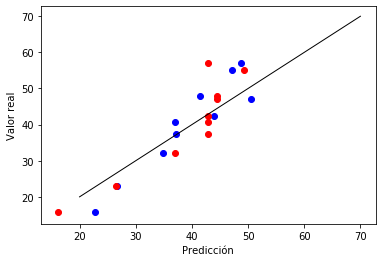

In [11]:
plt.scatter(y_predmlp, y_sample, color = 'blue')
plt.scatter(y_predreg, y_sample, color = 'red')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.plot([20,70],[20,70], 'black', linewidth=1)
plt.show()

Según el gráfico de predicciones del árbol y de la red, ambas presentan resultados aceptables comparados con los valores reales.